In [1]:
# !git clone https://github.com/vprayagala/OLS_LR_DiagnosticPlots.git
!git clone https://github.com/borisgarbuzov/diagnostic_plots.git

Cloning into 'diagnostic_plots'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [9]:
!ls

diagnostic_plots      Influence.png  OLS_LR_DiagnosticPlots  sample_data
Homoscadasticity.png  Normality.png  ResVsFitted.png


In [10]:
!cd /content/diagnostic_plots/

In [11]:
!ls

diagnostic_plots      Influence.png  OLS_LR_DiagnosticPlots  sample_data
Homoscadasticity.png  Normality.png  ResVsFitted.png


In [12]:
from sklearn.model_selection import train_test_split
from diagnostic_plots.DataHandler import PrepareData
from diagnostic_plots.ModelDiagnostics import Plot
import pandas as pd

In [13]:
DATA_DIR = "OLS_LR_DiagnosticPlots/CustomerData.csv"
df = pd.read_csv(DATA_DIR)
df.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [14]:
raw_df = PrepareData.load_data_local(DATA_DIR)
print("Data Shape:{}".format(raw_df.shape))
print("Data Types:{}".format(raw_df.dtypes))

drop_columns = ['CustomerID']

num_columns = ['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure', 'FrquncyOfPurchase',
                'NoOfUnitsPurchased', 'FrequencyOFPlay', 'NoOfGamesPlayed', 'NoOfGamesBought']
cat_columns = ['FavoriteChannelOfTransaction', 'FavoriteGame']

processed_df = PrepareData.pre_process_data(raw_df, drop_columns, num_columns, cat_columns)

print("Data Pre-Processing Done, Data Shape:{}".format(processed_df.shape))
x = processed_df.drop(['TotalRevenueGenerated'], axis=1)
y = processed_df.loc[:, 'TotalRevenueGenerated']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
print("Train Feature Shape:{}".format(x_train.shape))
print("Train Label Shape:{}".format(y_train.shape))
print("Test Feature Shape:{}".format(x_test.shape))
print("Test Label Shape:{}".format(y_test.shape))

Data Shape:(3209, 14)
Data Types:CustomerID                        int64
City                              int64
NoOfChildren                      int64
MinAgeOfChild                     int64
MaxAgeOfChild                     int64
Tenure                            int64
FrquncyOfPurchase                 int64
NoOfUnitsPurchased                int64
FrequencyOFPlay                   int64
NoOfGamesPlayed                   int64
NoOfGamesBought                   int64
FavoriteChannelOfTransaction     object
FavoriteGame                     object
TotalRevenueGenerated           float64
dtype: object
Data Pre-Processing Done, Data Shape:(3209, 16)
Train Feature Shape:(2150, 15)
Train Label Shape:(2150,)
Test Feature Shape:(1059, 15)
Test Label Shape:(1059,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Summary of Regression
:                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     442.6
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:02:34   Log-Likelihood:                -11127.
No. Observations:                2150   AIC:                         2.228e+04
Df Residuals:                    2136   BIC:                         2.236e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.5609      2.

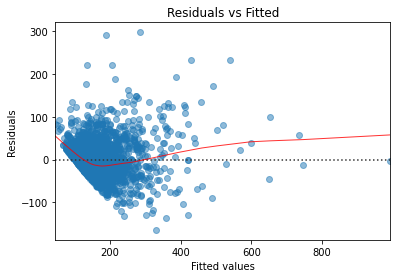

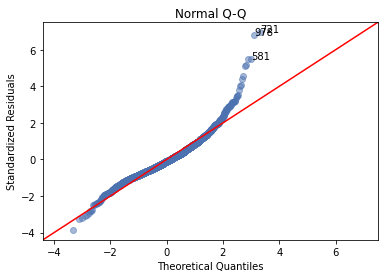

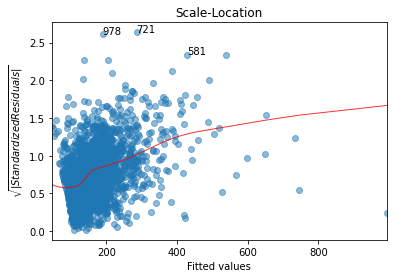

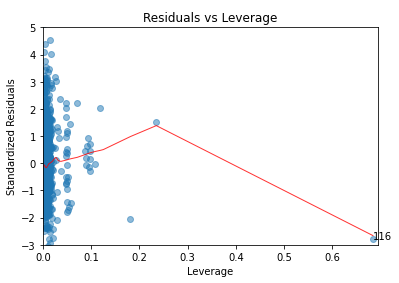

In [8]:
linear_plot = Plot.LinearRegressionResidualPlot(x_train.values, y_train.values)
lm = linear_plot.fit()
summary, diag_res = linear_plot.diagnostic_plots(lm)
print("Summary of Regression\n:{}".format(summary))
print("Diagnostic Tests of Regression\n:{}".format(diag_res))